In [45]:
import pandas as pd
import os
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('/kaggle/input/gdp-analysis/gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


## Check Description of any Column

In [46]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

## Analysing Arab World

In [47]:
df_pr = df[df['Country Name'] == 'Arab World']

<Axes: xlabel='YEARS', ylabel='GDP'>

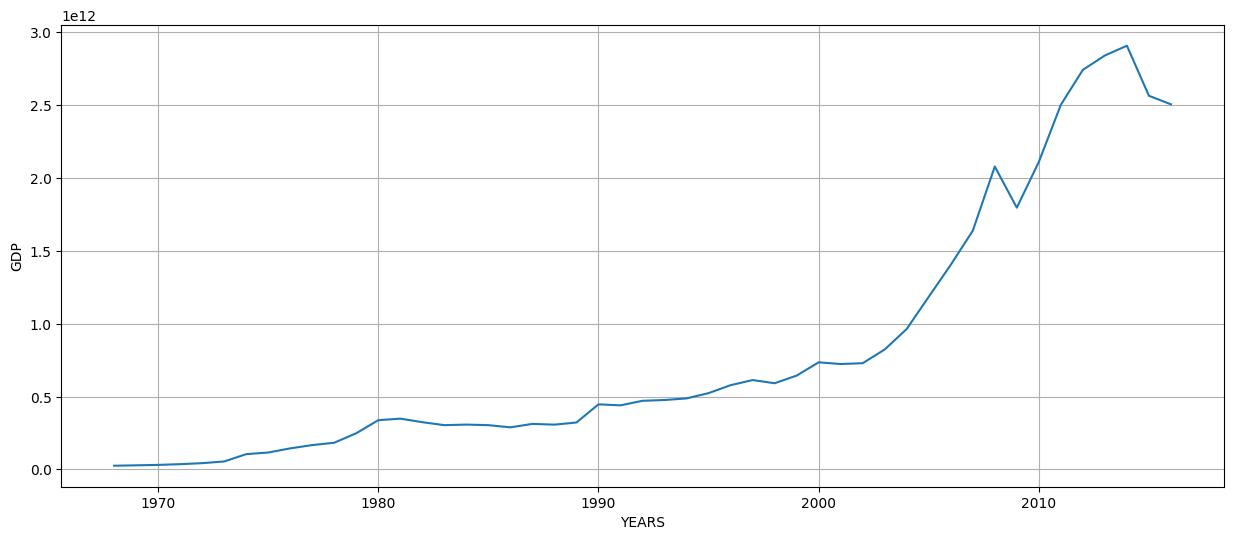

In [48]:
df_pr.plot(kind = 'line', x = 'Year', y = 'Value',
           figsize = (15,6),
           legend = False,
           grid = True,
           ylabel = 'GDP',
           xlabel = 'YEARS')

## growth of gdp of a country

In [49]:
data = df_pr.values
gdp_change = [0]

# Loop from the second element
for i in range(1, len(data)):
    prev = data[i-1][3] # previous GDP value 
    cur = data[i][3]
    
    # Append the calculated change to the 'gdp_change' list
    gdp_change.append(round(((cur - prev) / prev) * 100, 2))


In [50]:
df_pr.assign(GDPgrw = gdp_change)

,Country Name,Country Code,Year,Value,GDPgrw
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
5,Arab World,ARB,1973,5.501839e+10,27.02
6,Arab World,ARB,1974,1.051458e+11,91.11
7,Arab World,ARB,1975,1.163370e+11,10.64
8,Arab World,ARB,1976,1.448462e+11,24.51
9,Arab World,ARB,1977,1.673083e+11,15.51


## GDP Growth of every country


In [51]:
final_data = []

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):

        prev = data[i-1][3]
        cur = data[i][3]

        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)

In [52]:
df = pd.concat(final_data, axis = 0)

In [ ]:
df.groupby('Country Name').max()['Value'].sort_values(ascending = False).head(5)

## COMPARE GDP ACROSS COUNTRIES (adv)

In [ ]:
import os
import plotly.express as px
import plotly.offline as pyo

final_data = []

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):
        prev = data[i-1][3]
        cur = data[i][3]
        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)
    
df = pd.concat(final_data, axis = 0)

df.head()

## GDP comparison between specific countries

In [ ]:
lst = ['IND','ITA', 'USA', 'CHN']

dfs = []
for i in lst:
    dfs.append(df[df['Country Code'] == i])
    
    df_pr = pd.concat(dfs, axis = 0)


In [ ]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst), color = 'Country Name')

pyo.plot(fig, filename = '|'.join(lst) + '.html')

In [ ]:
def compare_gdp(lst, isOpen):
    
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)
        
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst), 
                  color = 'Country Name')
    pyo.plot(fig, filename = '|'.join(lst) + '.html', auto_open = isOpen)
    

In [ ]:
compare_gdp(['IND','USA'], False)

## GDP Growth Comparies of All the Countries

In [ ]:
fig = px.line(df, x = 'Year', y = 'GDP', title = 'GDP Comparison', color = 'Country Name')
pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

## GDP Growth of All Countries Graph Individual

In [ ]:
os.mkdir('GDP Growth Individual')

for country_name in df['Country Code'].unique():

    df_pr = df[df['Country Code'] == country_name]

    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = country_name)
    pyo.plot(fig, filename = 'GDP Growth Individual/' + country_name + '.html', auto_open = False)

## GDP Growth between 1960 - 2016

In [ ]:
dfs = []

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    
    if (len(df_pr) == 57):
        dfs.append(df_pr)
        
df_pr = pd.concat(dfs, axis = 0)

In [53]:
df_pr

,Country Name,Country Code,Year,Value,GDP
11450,Zimbabwe,ZWE,1960,1.052990e+09,0.00
11451,Zimbabwe,ZWE,1961,1.096647e+09,4.15
11452,Zimbabwe,ZWE,1962,1.117602e+09,1.91
11453,Zimbabwe,ZWE,1963,1.159512e+09,3.75
11454,Zimbabwe,ZWE,1964,1.217138e+09,4.97
11455,Zimbabwe,ZWE,1965,1.311436e+09,7.75
11456,Zimbabwe,ZWE,1966,1.281750e+09,-2.26
11457,Zimbabwe,ZWE,1967,1.397002e+09,8.99
11458,Zimbabwe,ZWE,1968,1.479600e+09,5.91
11459,Zimbabwe,ZWE,1969,1.747999e+09,18.14
